In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

In [4]:
(X_train,Y_train) , (X_test,Y_test) = tf.keras.datasets.cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 64s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [9]:
Y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
def plot_sam(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

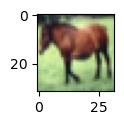

In [25]:
plot_sam(7)

In [18]:
Y_train[5]

array([1], dtype=uint8)

In [19]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [26]:
classes[Y_train[7][0]]

'horse'

In [27]:
X_train = X_train/255
X_test = X_test/255

In [50]:
Y_train_categorical = keras.utils.to_categorical(
    Y_train,num_classes=10,dtype="float32"
)
y_test_categorical = keras.utils.to_categorical(
    Y_test, num_classes=10, dtype='float32'
)

In [30]:
Y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
X_train.shape

(50000, 32, 32, 3)

In [33]:
32*32*3

3072

In [53]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train_categorical, epochs=1)

1563/1563 [==============================] - 70s 45ms/step - loss: 1.8127 - accuracy: 0.3522


In [58]:
classes[np.argmax(model.predict(X_test)[1])]

313/313 [==============================] - 6s 18ms/step


'ship'

In [59]:
classes[Y_test[1][0]]

'ship'